In [1]:
import pyrealsense2 as rs
import matplotlib.pyplot as plt
import numpy as np
import imageio
import time
import cv2
import glob

pipeline = rs.pipeline()
config = rs.config()

filenames = glob.glob('210927-145329/*.bag')



#config.enable_stream(rs.stream.depth, rs.format.z16, 30)



cv2.namedWindow("Depth Stream", cv2.WINDOW_AUTOSIZE)
colorizer = rs.colorizer()

decimation = rs.decimation_filter()
decimation.set_option(rs.option.filter_magnitude, 1)

spatial = rs.spatial_filter()
spatial.set_option(rs.option.filter_magnitude, 5)
spatial.set_option(rs.option.filter_smooth_alpha, 1)
spatial.set_option(rs.option.filter_smooth_delta, 50)
spatial.set_option(rs.option.holes_fill, 2)

i = 0
config.enable_device_from_file(filenames[0], False)
pipeline.start(config)
    
    
while True:
    
    frames = pipeline.wait_for_frames()

        # Get depth frame
    depth_frame = frames.get_depth_frame()
    
    decimated_depth = decimation.process(depth_frame)
    filtered_depth = spatial.process(decimated_depth)
        # Colorize depth frame to jet colormap
    depth_color_frame = colorizer.colorize(filtered_depth)

        # Convert depth_frame to numpy array to render image in opencv
    depth_color_image = np.asanyarray(depth_color_frame.get_data())

        # Render image in opencv window
    cv2.imshow("Depth Stream", depth_color_image)
    key = cv2.waitKey(1)
        # if pressed escape exit program
    i+=1
    #pipeline.stop()
    if key == 27:
        cv2.destroyAllWindows()
        break
            
            


RuntimeError: Frame didn't arrive within 5000

In [7]:
import pyrealsense2 as rs
import matplotlib.pyplot as plt
import numpy as np
import imageio
import time
import cv2
import glob
import os

def extract_tiff_from_bag(filename, destination):
    try:
        pipeline = rs.pipeline()
        config = rs.config()
        config.enable_device_from_file(filename, False)
        pipeline.start(config)
    except RuntimeError:
        return

        
    
    
    #decimation = rs.decimation_filter()
    #decimation.set_option(rs.option.filter_magnitude, 1)

    spatial = rs.spatial_filter()
    spatial.set_option(rs.option.filter_magnitude, 5)
    spatial.set_option(rs.option.filter_smooth_alpha, 0.5) #was 1
    spatial.set_option(rs.option.filter_smooth_delta, 20) #was 50
    spatial.set_option(rs.option.holes_fill, 2)

    #this temporal filtering is added 1/25/22, so it might be the source of things breaking
    temporal = rs.temporal_filter()
    temporal.set_option(rs.option.filter_smooth_alpha, 0.15)
    temporal.set_option(rs.option.filter_smooth_delta, 50)
    temporal.set_option(rs.option.holes_fill, 3)
    
    align_to = rs.stream.color
    align = rs.align(align_to)

    i = 0
    stop = True
    while True:
        try:
            frames = pipeline.wait_for_frames(100)
            aligned_frames = align.process(frames)
            depth_frame = aligned_frames.get_depth_frame()
            color_frame = aligned_frames.get_color_frame()
            
            #decimated_depth = decimation.process(depth_frame)
            spatial_depth = spatial.process(depth_frame)
            filtered_depth = temporal.process(spatial_depth)
            depth_image = np.asanyarray(filtered_depth.get_data())
            color_image = np.asanyarray(color_frame.get_data())
            imageio.imwrite(destination+f"{i}_D.tif", depth_image, 'TIFF')
            imageio.imwrite(destination+f"{i}_C.tif", color_image, 'TIFF')
            time.sleep(0.01)
            i+=1
            
        except RuntimeError:
            pipeline.stop()
            stop = False
            break
    
    if stop == True:
        pipeline.stop()
    return
    
    

In [8]:
import pyrealsense2 as rs
import matplotlib.pyplot as plt
import numpy as np
import imageio
import time
import cv2
import glob
import os

filename = '10_21_data_bags'
filenames = glob.glob(filename+'\\*.bag')
# print(filenames)

destinations = []

dest_dir = '10_21_data_aligned_filtered'
try:
    os.mkdir(dest_dir)
except FileExistsError:
    pass

for i in range(0, len(filenames)):
    #os.chdir(dest_dir)
    #os.mkdir(os.path.basename(filenames[i])[0:-4])
    try:
        os.mkdir(dest_dir+'\\'+os.path.basename(filenames[i])[0:-4])
    except FileExistsError:
        pass
    
    destinations.append('\\Users\\zacha\\Documents\\Precision Ranching Code\\'+dest_dir+'\\'+os.path.basename(filenames[i])[0:-4]+'\\')
    #os.chdir('..')
    
# print(destinations)

for i in range(0, len(filenames)):
    extract_tiff_from_bag(filenames[i], destinations[i])
    print(filenames[i], 'done')

10_21_data_bags\Cow_1.bag done
10_21_data_bags\Cow_10.bag done
10_21_data_bags\Cow_10_1.bag done
10_21_data_bags\Cow_11.bag done
10_21_data_bags\Cow_11_1.bag done
10_21_data_bags\Cow_11_2.bag done
10_21_data_bags\Cow_12.bag done
10_21_data_bags\Cow_13_1.bag done
10_21_data_bags\Cow_14.bag done
10_21_data_bags\Cow_15.bag done
10_21_data_bags\Cow_16.bag done
10_21_data_bags\Cow_16_1.bag done
10_21_data_bags\Cow_16_2.bag done
10_21_data_bags\Cow_17_maybe_16.bag done
10_21_data_bags\Cow_18.bag done
10_21_data_bags\Cow_19.bag done
10_21_data_bags\Cow_2.bag done
10_21_data_bags\Cow_20.bag done
10_21_data_bags\Cow_21.bag done
10_21_data_bags\Cow_22.bag done
10_21_data_bags\Cow_22_1_other_camera_says_23.bag done
10_21_data_bags\Cow_23.bag done
10_21_data_bags\Cow_23_1.bag done
10_21_data_bags\Cow_24.bag done
10_21_data_bags\Cow_25.bag done
10_21_data_bags\Cow_26.bag done
10_21_data_bags\Cow_27.bag done
10_21_data_bags\Cow_27_1.bag done
10_21_data_bags\Cow_28.bag done
10_21_data_bags\Cow_29.bag

In [7]:
extract_tiff_from_bag("10_21_data_bags\\Cow_41_1.bag", "background_images\\")

img = imageio.imread("background_images\\155_D.tif")
print(np.shape(img))

(480, 640)


In [58]:
bcs_sorted = glob.glob('BCS_sorted\\*\\*\\*')
aligned_images = glob.glob('10_21_data_aligned_filtered\\*\\*')
# print(aligned_images[0])
# print(bcs_sorted[0])
for i in range(0, len(aligned_images)):
    for j in range(0, len(bcs_sorted)):
        if aligned_images[i][len('10_21_data_aligned_filtered/'):] == bcs_sorted[j][len('BCS_sorted/2/'):]:
            try:
                new_dir = str(bcs_sorted[j]).replace('BCS_sorted', 'BCS_aligned_sorted_filtered')
                new_dir_base = os.path.basename(new_dir)
                os.mkdir(new_dir[:-len(new_dir_base)])
            except:
                pass
            imageio.imwrite(str(bcs_sorted[j]).replace('BCS_sorted', 'BCS_aligned_sorted_filtered'), imageio.imread(aligned_images[i]), 'TIFF')

In [55]:
print(os.path.basename('BCS_sorted\\3\\Cow_3\\1.tif'))

1.tif


In [ ]:
bcs_sorted = glob.glob('BCS_sorted\\*\\*\\*')
aligned_images = glob.glob('10_21_data_aligned_filtered\\*\\*')

bcs_sorted_names = []
for name in bcs_sorted:
    bcs_sorted_names.append(name[len('BCS_aligned_sorted//1'):])


bcs_filtered_names = []
for name in aligned_images:
    bcs_filtered_names.append(name[len('10_21_data_aligned_filtered//'):])


for element in aligned_images:
    if element[len('10_21_data_aligned_filtered//')] in bcs_sorted_names:
        element.replace('10_21_data_aligned_filtered', 'BCS_aligned_sorted_filtered')

In [59]:
bcs_sorted = glob.glob('BCS_aligned_sorted\\*\\*\\*')
bcs_filtered = glob.glob('BCS_aligned_sorted_filtered\\*\\*\\*')

bcs_sorted_names = []
for name in bcs_sorted:
    bcs_sorted_names.append(name[len('BCS_aligned_sorted//1'):])


bcs_filtered_names = []
for name in bcs_filtered:
    bcs_filtered_names.append(name[len('BCS_aligned_sorted_filtered//1'):])

set(bcs_sorted_names) and not set(bcs_filtered_names)
# print(bcs_filtered_names)
# print(bcs_sorted_names)



different = []
# if bcs_sorted_names in (list) and not in (bcs_filtered_names):
#     different.append(bcs_sorted_names)

for element in bcs_sorted_names:
    if element not in (bcs_filtered_names):
        different.append(element)
#print(different)
print(len(different))
print(len(bcs_sorted_names)-len(bcs_filtered_names))
print(different)

78
-24
['Cow_11_2\\243_C.tif', 'Cow_11_2\\243_D.tif', 'Cow_26\\85_C.tif', 'Cow_26\\85_D.tif', 'Cow_13_1\\125_C.tif', 'Cow_13_1\\125_D.tif', 'Cow_31\\91_C.tif', 'Cow_31\\91_D.tif', 'Cow_31\\92_C.tif', 'Cow_31\\92_D.tif', 'Cow_34_1\\173_C.tif', 'Cow_34_1\\173_D.tif', 'Cow_45\\180_C.tif', 'Cow_45\\180_D.tif', 'Cow_7\\175_C.tif', 'Cow_7\\175_D.tif', 'Cow_8\\263_C.tif', 'Cow_8\\263_D.tif', 'Cow_8\\264_C.tif', 'Cow_8\\264_D.tif', 'Cow_8\\265_C.tif', 'Cow_8\\265_D.tif', 'Cow_9\\138_C.tif', 'Cow_9\\138_D.tif', 'Cow_9\\139_C.tif', 'Cow_9\\139_D.tif', 'Cow_3\\112_C.tif', 'Cow_3\\112_D.tif', 'Cow_35\\207_C.tif', 'Cow_35\\207_D.tif', 'Cow_35\\208_C.tif', 'Cow_35\\208_D.tif', 'Cow_35\\209_C.tif', 'Cow_35\\209_D.tif', 'Cow_35\\210_C.tif', 'Cow_35\\210_D.tif', 'Cow_35\\211_C.tif', 'Cow_35\\211_D.tif', 'Cow_36_1\\209_C.tif', 'Cow_36_1\\209_D.tif', 'Cow_36_1\\210_C.tif', 'Cow_36_1\\210_D.tif', 'Cow_36_1\\211_C.tif', 'Cow_36_1\\211_D.tif', 'Cow_18\\201_C.tif', 'Cow_18\\201_D.tif', 'Cow_18\\202_C.tif', '

In [34]:
# print(len('BCS_sorted/'))
# test = 'BCS_sorted/2'
# print(test[11])

# print(os.path.basename(str(bcs_sorted[j][0:len('BCS_sorted/3/Cow_1/')]).replace('BCS_sorted', 'BCS_aligned_sorted')))


# print(aligned_images[i][len('10_21_data_aligned/'):])

# print(bcs_sorted[j][len('BCS_sorted/2/'):])

# new_dir = str(bcs_sorted[j][0:len('BCS_sorted/3/Cow_1/')]).replace('BCS_sorted', 'BCS_aligned_sorted')
# new_dir_base = os.path.basename(new_dir)
# print(str(bcs_sorted[j][0:len('BCS_sorted/3/'+str(new_dir_base))]).replace('BCS_sorted', 'BCS_aligned_sorted'))

#print(str(bcs_sorted[j]).replace('BCS_sorted', 'BCS_aligned_sorted'))
new_dir = str(bcs_sorted[j]).replace('BCS_sorted', 'BCS_aligned_sorted')
new_dir_base = os.path.basename(new_dir)
print(new_dir_base)
print(new_dir)
#print(os.path.basename(str(bcs_sorted[j]).replace('BCS_sorted', 'BCS_aligned_sorted')))
print(new_dir[:-len(new_dir_base)])

0_C.tif
BCS_aligned_sorted\4\Cow_10_1\0_C.tif
BCS_aligned_sorted\4\Cow_10_1\


127


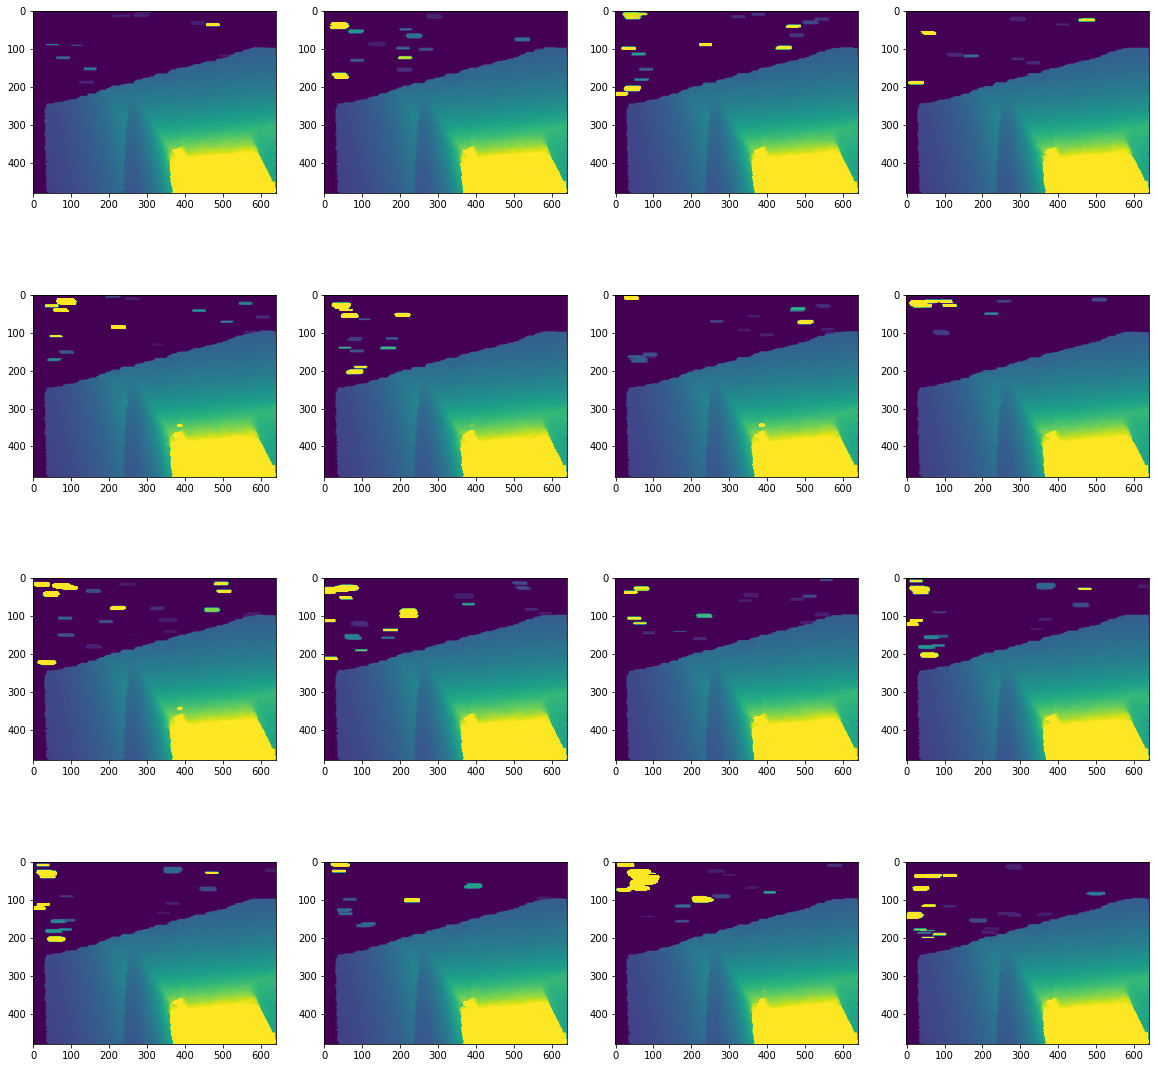

In [19]:
images = glob.glob('Videos\\unprocessed_tif\\unprocessed_vid_3\\*.tif')
num_images = len(images)
print(num_images)

plt.figure(figsize=(20,20))

num_plot = 16

j = 1
for i in range(0, num_plot):#, int(num_images/num_plot)):
    plt.subplot(int(np.sqrt(num_plot)), int(np.sqrt(num_plot)), j)
    plt.imshow(imageio.imread(f'Videos\\unprocessed_tif\\unprocessed_vid_3\\{i}.tif'), vmax = 2000)
    j+=1


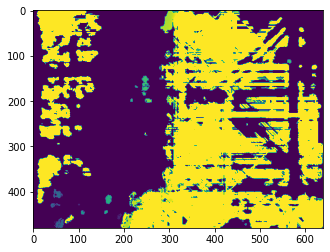

In [25]:
plt.imshow(imageio.imread('camera_test_1\\211001-153022\\No_RFID_1_D.tif'), vmax = 2000)